In [148]:
import numpy as np
import string
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [39]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
 
def extract_features(directory):

    model = VGG16()
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    print(model.summary())
    features = dict()
    for name in listdir(directory):
        filename = directory + '/' + name
        image = load_img(filename, target_size=(224, 224))
        image = img_to_array(image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        feature = model.predict(image, verbose=0)
        image_id = name.split('.')[0]
        features[image_id] = feature
        print(name)
    return features
 
directory = 'Flickr8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
dump(features, open('features.pkl', 'wb'))

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

KeyboardInterrupt: 

In [117]:
import pickle
file=open('features.pkl','rb')
features=pickle.load(file)

In [118]:
file=open('Flickr8k_text/Flickr8k.token.txt','r')
data=file.read()
file.close()

In [119]:
                                                                                                    descriptions={}
for line in data.split('\n'):
    
    img=line.split(' ')[0].split('.')[0]
    
    if(img=='' or len(line.split(' '))<=1):
        continue
        
    desc=[]
    for word in line.split(' ')[1:]:
        if(len(word)<=1):
            continue
        if(word==''):
            print(1111111)
        word=word.lower()
        word=[c for c in word if c not in string.punctuation]
        word=''.join(word)
        if(len(word)>1 and word.isalpha()):
            if(word==''):
                print(1111111)
            desc.append(word)
    desc='startseq '+' '.join(desc)+' endseq'
    if(img not in descriptions):
        descriptions[img]=[]
    descriptions[img].append(desc)

In [120]:
descriptions

{'1000268201_693b08cb0e': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tricolored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq dogs of different breeds looking at each other on the road endseq',
  'startseq dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted rainbow endseq',
  's

In [121]:
for img,desc_list in descriptions.items():
    for desc in desc_list:
        for word in desc.split(' '):
            if word=='':
                print(111111111111)

In [122]:
vocab=[]
mx=-1
for img,desc_list in descriptions.items():
    for desc in desc_list:
        cnt=0
        for word in desc.split(' '):
            vocab.append(word)
            cnt+=1
        mx=max(mx,cnt)
vocab.append('')
vocab=set(vocab)

vocab=list(vocab)
vocab.sort()



    

In [123]:
vocab

['',
 'abandon',
 'abandoned',
 'abarrotes',
 'abdomen',
 'ability',
 'aboard',
 'aboriginal',
 'about',
 'above',
 'aboveground',
 'abs',
 'abseiling',
 'ac',
 'accelerates',
 'accends',
 'accent',
 'accented',
 'accents',
 'accepting',
 'accepts',
 'accessories',
 'accident',
 'accompanied',
 'accompanies',
 'accompanying',
 'accordion',
 'accross',
 'ace',
 'acoustic',
 'acrobat',
 'acrobatic',
 'acrobatics',
 'acroos',
 'across',
 'acrouss',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'actor',
 'actors',
 'acts',
 'ad',
 'add',
 'additional',
 'addressing',
 'adhd',
 'adjust',
 'adjusting',
 'adjustments',
 'adjusts',
 'admire',
 'admired',
 'admires',
 'admiring',
 'adobe',
 'adolescent',
 'adolescents',
 'adopted',
 'adorn',
 'adorned',
 'adornment',
 'ads',
 'adult',
 'adults',
 'advance',
 'advances',
 'advantage',
 'adventurer',
 'adventures',
 'advertisement',
 'advertisements',
 'advertising',
 'advertisment',
 'advertizing',
 'aerial',


In [124]:
questions=[]
questions.append("what is the little girl doing ?")
questions.append("what is the dog doing ?")
questions.append("where is the little girl sitting ?")
questions.append("what is the man doing ?")
questions.append("what is the man wearing ?")
questions.append("what is the child playing ?")
questions.append("what is the blak and white dog doing ?")
questions.append("who is there behind the boy ?")
questions.append("what is the dog doing ?")
questions.append("where is the man looking ?")

In [125]:
for question in questions:
    for word in question.split(' '):
        if(word not in vocab):
            vocab.append(word)
vocab=set(vocab)
vocab=list(vocab)
vocab.sort()

In [126]:
len(vocab)

8685

In [127]:
cnt=0
idx={}
for word in vocab:
    idx[word]=cnt
    cnt+=1

In [128]:
def encode(s,n,v):
    ans=np.zeros((n,v))
    i=0
    for word in s.split(' '):
        ans[i]=to_categorical(idx[word],v)
        i=i+1
    if(i<mx):
        ans[i:,0]=1
    return ans 

In [129]:
X1_train=[]
X2_train=[]
X3_train=[]
Y_train=[]
cnt=0
for img,desc_list in descriptions.items():
    if(cnt==10):
        break
        
    for desc in desc_list:
        curr='startseq'
        for word in desc.split(' '):
            if(word=='startseq'):
                continue
            X1_train.append(features[img])
            X2_train.append(encode(questions[cnt],mx,len(vocab)))
            X3_train.append(encode(curr,mx,len(vocab)))
            print(questions[cnt],'===',curr,"===",word)
            Y_train.append(to_categorical(idx[word],len(vocab)))
            
            curr=curr+' '+word
            
            if(word=='endseq'):
                break
    cnt+=1

what is the little girl doing ? === startseq === child
what is the little girl doing ? === startseq child === in
what is the little girl doing ? === startseq child in === pink
what is the little girl doing ? === startseq child in pink === dress
what is the little girl doing ? === startseq child in pink dress === is
what is the little girl doing ? === startseq child in pink dress is === climbing
what is the little girl doing ? === startseq child in pink dress is climbing === up
what is the little girl doing ? === startseq child in pink dress is climbing up === set
what is the little girl doing ? === startseq child in pink dress is climbing up set === of
what is the little girl doing ? === startseq child in pink dress is climbing up set of === stairs
what is the little girl doing ? === startseq child in pink dress is climbing up set of stairs === in
what is the little girl doing ? === startseq child in pink dress is climbing up set of stairs in === an
what is the little girl doing ? === 

where is the little girl sitting ? === startseq little girl is === sitting
where is the little girl sitting ? === startseq little girl is sitting === in
where is the little girl sitting ? === startseq little girl is sitting in === front
where is the little girl sitting ? === startseq little girl is sitting in front === of
where is the little girl sitting ? === startseq little girl is sitting in front of === large
where is the little girl sitting ? === startseq little girl is sitting in front of large === painted
where is the little girl sitting ? === startseq little girl is sitting in front of large painted === rainbow
where is the little girl sitting ? === startseq little girl is sitting in front of large painted rainbow === endseq
where is the little girl sitting ? === startseq === small
where is the little girl sitting ? === startseq small === girl
where is the little girl sitting ? === startseq small girl === in
where is the little girl sitting ? === startseq small girl in === the


what is the man wearing ? === startseq man with gauges === and
what is the man wearing ? === startseq man with gauges and === glasses
what is the man wearing ? === startseq man with gauges and glasses === is
what is the man wearing ? === startseq man with gauges and glasses is === wearing
what is the man wearing ? === startseq man with gauges and glasses is wearing === blitz
what is the man wearing ? === startseq man with gauges and glasses is wearing blitz === hat
what is the man wearing ? === startseq man with gauges and glasses is wearing blitz hat === endseq
what is the man wearing ? === startseq === man
what is the man wearing ? === startseq man === with
what is the man wearing ? === startseq man with === glasses
what is the man wearing ? === startseq man with glasses === is
what is the man wearing ? === startseq man with glasses is === wearing
what is the man wearing ? === startseq man with glasses is wearing === beer
what is the man wearing ? === startseq man with glasses is wea

what is the blak and white dog doing ? === startseq dog runs on the green grass near wooden fence === endseq
who is there behind the boy ? === startseq === dog
who is there behind the boy ? === startseq dog === shakes
who is there behind the boy ? === startseq dog shakes === its
who is there behind the boy ? === startseq dog shakes its === head
who is there behind the boy ? === startseq dog shakes its head === near
who is there behind the boy ? === startseq dog shakes its head near === the
who is there behind the boy ? === startseq dog shakes its head near the === shore
who is there behind the boy ? === startseq dog shakes its head near the shore === red
who is there behind the boy ? === startseq dog shakes its head near the shore red === ball
who is there behind the boy ? === startseq dog shakes its head near the shore red ball === next
who is there behind the boy ? === startseq dog shakes its head near the shore red ball next === to
who is there behind the boy ? === startseq dog shak

where is the man looking ? === startseq === black
where is the man looking ? === startseq black === dog
where is the man looking ? === startseq black dog === leaps
where is the man looking ? === startseq black dog leaps === over
where is the man looking ? === startseq black dog leaps over === log
where is the man looking ? === startseq black dog leaps over log === endseq
where is the man looking ? === startseq === grey
where is the man looking ? === startseq grey === dog
where is the man looking ? === startseq grey dog === is
where is the man looking ? === startseq grey dog is === leaping
where is the man looking ? === startseq grey dog is leaping === over
where is the man looking ? === startseq grey dog is leaping over === fallen
where is the man looking ? === startseq grey dog is leaping over fallen === tree
where is the man looking ? === startseq grey dog is leaping over fallen tree === endseq
where is the man looking ? === startseq === large
where is the man looking ? === startseq 

In [130]:
X1_train=np.array(X1_train)
X2_train=np.array(X2_train)
X3_train=np.array(X3_train)
Y_train=np.array(Y_train)
X1_train=X1_train.reshape(len(X1_train),4096)

In [131]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

In [132]:
def define_model(max_length,vocab_size):
    
    # feature extractor model (X1)
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    
    # question model (X2)
    inputs2 = Input(shape=(max_length,vocab_size))
    se2 = Dropout(0.5)(inputs2)
    se3 = LSTM(256)(se2)
    
    # answer model (X3)
    inputs3 = Input(shape=(max_length,vocab_size))
    se4 = Dropout(0.5)(inputs3)
    se5 = LSTM(256)(se4)
    
   # decoder model
    decoder1 = add([fe2, se3, se5])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    
    # tie it together [image, question, answer] [word]
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # summarize model
    print(model.summary())
    
    return model

In [133]:
model=define_model(mx,len(vocab))

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 4096)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 33, 8685)     0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 33, 8685)     0                                            
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 4096)         0           input_13[0][0]                   
____________________________________________________________________________________________

In [139]:
X1_test=[]
X2_test=[]
X3_test=[]
Y_test=[]
cnt=0
for img,desc_list in descriptions.items():
    if(cnt==2):
        break
        
    for desc in desc_list:
        curr='startseq'
        for word in desc.split(' '):
            if(word=='startseq'):
                continue
            X1_test.append(features[img])
            X2_test.append(encode(questions[cnt],mx,len(vocab)))
            X3_test.append(encode(curr,mx,len(vocab)))
            print(questions[cnt],'===',curr,"===",word)
            Y_test.append(to_categorical(idx[word],len(vocab)))
            
            curr=curr+' '+word
            
            if(word=='endseq'):
                break
    cnt+=1

what is the little girl doing ? === startseq === child
what is the little girl doing ? === startseq child === in
what is the little girl doing ? === startseq child in === pink
what is the little girl doing ? === startseq child in pink === dress
what is the little girl doing ? === startseq child in pink dress === is
what is the little girl doing ? === startseq child in pink dress is === climbing
what is the little girl doing ? === startseq child in pink dress is climbing === up
what is the little girl doing ? === startseq child in pink dress is climbing up === set
what is the little girl doing ? === startseq child in pink dress is climbing up set === of
what is the little girl doing ? === startseq child in pink dress is climbing up set of === stairs
what is the little girl doing ? === startseq child in pink dress is climbing up set of stairs === in
what is the little girl doing ? === startseq child in pink dress is climbing up set of stairs in === an
what is the little girl doing ? === 

In [140]:
X1_test=np.array(X1_test)
X2_test=np.array(X2_test)
X3_test=np.array(X3_test)
Y_test=np.array(Y_test)
X1_test=X1_test.reshape(len(X1_test),4096)

In [142]:
history=model.fit([X1_train,X2_train,X3_train],Y_train,validation_data=([X1_test,X2_test,X3_test],Y_test),epochs=10,batch_size=32)

Train on 554 samples, validate on 105 samples
Epoch 1/10
554/554 [==============================] - 107s 194ms/step - loss: 3.5795 - accuracy: 0.0451 - val_loss: 3.2629 - val_accuracy: 0.0857
Epoch 2/10
554/554 [==============================] - 101s 182ms/step - loss: 3.4946 - accuracy: 0.0596 - val_loss: 3.2289 - val_accuracy: 0.1048
Epoch 3/10
554/554 [==============================] - 103s 186ms/step - loss: 3.4891 - accuracy: 0.0596 - val_loss: 3.2360 - val_accuracy: 0.0762
Epoch 4/10
554/554 [==============================] - 104s 187ms/step - loss: 3.4734 - accuracy: 0.0614 - val_loss: 3.2220 - val_accuracy: 0.1048
Epoch 5/10
554/554 [==============================] - 104s 187ms/step - loss: 3.4206 - accuracy: 0.0776 - val_loss: 3.2081 - val_accuracy: 0.0762
Epoch 6/10
554/554 [==============================] - 99s 179ms/step - loss: 3.4111 - accuracy: 0.0560 - val_loss: 3.1859 - val_accuracy: 0.0952
Epoch 7/10
554/554 [==============================] - 99s 178ms/step - loss: 3.

In [143]:
model.save('model.h5')

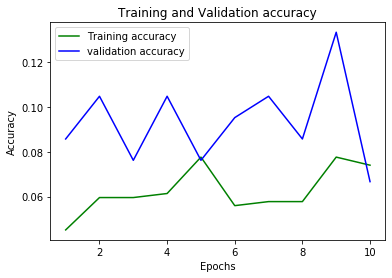

In [150]:

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

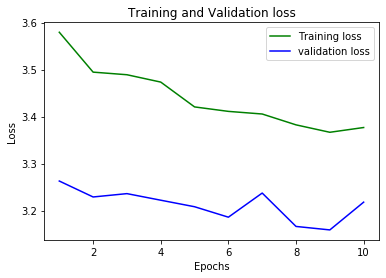

In [152]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
def get_feature(filename):
    model = VGG16()
       
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    
    image = load_img(filename, target_size=(224, 224))
        
    image = img_to_array(image)
       
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    image = preprocess_input(image)
   
    feature = model.predict(image, verbose=0)
    return feature

In [31]:
def generate_caption(model,feature):
    X1=np.zeros((1,4096))
    X2=np.zeros((1,mx,len(vocab)))
    X3=np.zeros((1,mx,len(vocab)))
    X1[0]=feature
    X2[0]=encode(questions[0],mx,len(vocab))
    X3[0]=encode("startseq",mx,len(vocab))
    
    ans="startseq"
    
    while(1):
        Y=model.predict([X1,X2,X3])
        Y=np.argmax(Y)
        ans=ans+' '+vocab[Y]
        print(vocab[Y])
        if(vocab[Y]=='endseq'):
            break
        X3[0]=encode(ans,mx,len(vocab))
        
    return ans

In [33]:
from keras.models import load_model
feature=get_feature('Flickr8k_Dataset/1000268201_693b08cb0e.jpg')
model=load_model('model.h5')

print(generate_caption(model,feature))

in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in
in


IndexError: index 33 is out of bounds for axis 0 with size 33